# ПР №5

Выполнил Сердюков Матвей, ББМО-01-23

## Импорт библиотек

In [66]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Загрузка датасета и обработка данных

In [67]:
url = 'https://raw.githubusercontent.com/TQRG/security-patches-dataset/main/data/secbench/github-secbench-patches.csv'
df = pd.read_csv(url)
df.head()

,owner,project,sha,sha-p,year,language,cve_id,cwe_id,score,severity
0,pfsense,pfsense,002bc4ab3268e6e5cb3a01ce73a4c1624d09050a,d6a0379d291f5e98500776618559343f40254e40,2010,php,NaN,CWE-77,NaN,NaN
1,nextcloud,server,0074062b5329c3d43679909fddce2d70608a4475,5c6a7172cafc395d38c58d1b5afd6b36efb33ad5,2012,php,NaN,CWE-79,NaN,NaN
2,nextcloud,server,0241ddc759f7e2d2695c4626df5d2ac27b8b1d90,c2e2c59ca7aa873bd07de04ea701a8b351383aec,2014,php,NaN,CWE-384,NaN,NaN
3,mantisbt,mantisbt,00b4c17088fa56594d85fe46b6c6057bb3421102,b72fdaeb7cb8786401faab520d43092c8bdb44aa,2014,php,CVE-2014-1608,CWE-89,7.5,HIGH
4,splitbrain,dokuwiki,02b0b681935185a1c4d2d64e76fe499f3d438d12,10ffc9dd6a89562ef502baa21f968cf269fe21b0,2006,php,NaN,CWE-79,NaN,NaN


In [68]:
# удаление ненужного столбца
df.drop(['cve_id', 'sha-p', 'sha'], axis=1, inplace=True)

# заполнение пустых значений
df['score'] = df['score'].fillna(df['score'].mean())

# кодирование категориальных признаков
df = pd.get_dummies(df, columns=['owner', 'project', 'language', 'severity', 'cwe_id'])

df

,year,score,owner_AFNetworking,owner_BradLarson,owner_Codiad,owner_FFmpeg,owner_FreeRDP,owner_Graylog2,owner_HandBrake,owner_MISP,...,cwe_id_CWE-79,cwe_id_CWE-843,cwe_id_CWE-89,cwe_id_CWE-915,cwe_id_CWE-916,cwe_id_CWE-918,cwe_id_CWE-928,cwe_id_CWE-94,cwe_id_CWE-98,cwe_id_NVD-CWE-Other
0,2010,5.338798,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2012,5.338798,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,2014,5.338798,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2014,7.500000,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,2006,5.338798,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,2015,5.338798,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
672,2012,7.500000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
673,2012,5.000000,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
674,2012,5.338798,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Отбор признаков

<Axes: >

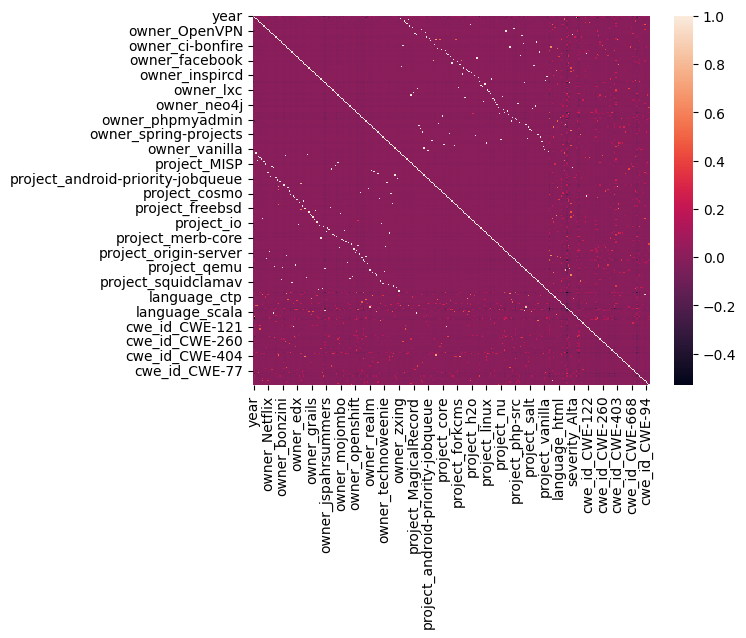

In [69]:
features = df.corr()
sns.heatmap(features)

In [70]:
important_features = features['score'].sort_values(ascending=False)[1:6].index.to_list()
important_features

['severity_HIGH',
 'cwe_id_CWE-89',
 'cwe_id_CWE-119',
 'cwe_id_CWE-264',
 'project_php-src']

## Обучение модели

In [71]:
le = LabelEncoder()
y = le.fit_transform(df['score'])
X = df.drop('score', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X[important_features], y, test_size=0.2, random_state=1337)

# Обучение модели
model = LogisticRegression()
model.fit(X_train, y_train)

# Оценка качества модели на тестовой выборке
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 71.32%
